## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>


how many percentage of  bookings have been cancelled months wise?

how many people have cancelled their reservations in the month of july?

which type of hotels are mostly booked in weekend nights?

top three repeated guests in resort hotel

top three repeated guests in city hotel

find the deposit-type of the customers having children

Which is the top fourth country from where most booking are done?

top 3 special guests whic are also repeated guests

which type of hotel get maximum number of cancellation of bookings

how many couples with children ordered meal?

maximun number of reseervation_status as checked_out

average booking charges of country GBR?


In [3]:
# importing packages
 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
path ='/content/drive/MyDrive/Colab Notebooks/Capstone_Project/Hotel_Booking_Analysis/Copy of Copy of Hotel Bookings.csv' 
hotel_data_raw = pd.read_csv(path)

In [6]:
hotel_data_raw.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [7]:
hotel_data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [8]:
hotel_data_raw.duplicated().value_counts()

False    87396
True     31994
dtype: int64

In [9]:
hotel_data = hotel_data_raw.drop(hotel_data_raw.duplicated().value_counts())

In [10]:
hotel_data = hotel_data_raw.drop_duplicates(keep ='first')

In [11]:
hotel_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87396 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           87396 non-null  object 
 1   is_canceled                     87396 non-null  int64  
 2   lead_time                       87396 non-null  int64  
 3   arrival_date_year               87396 non-null  int64  
 4   arrival_date_month              87396 non-null  object 
 5   arrival_date_week_number        87396 non-null  int64  
 6   arrival_date_day_of_month       87396 non-null  int64  
 7   stays_in_weekend_nights         87396 non-null  int64  
 8   stays_in_week_nights            87396 non-null  int64  
 9   adults                          87396 non-null  int64  
 10  children                        87392 non-null  float64
 11  babies                          87396 non-null  int64  
 12  meal                           

In [12]:
hotel_data.shape

(87396, 32)

In [13]:
#  to check null values
hotel_data.isnull().sum().sort_values(ascending = False)

company                           82137
agent                             12193
country                             452
children                              4
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
hotel                                 0
previous_cancellations                0
days_in_waiting_list                  0
customer_type                         0
adr                                   0
required_car_parking_spaces           0
total_of_special_requests             0
reservation_status                    0
previous_bookings_not_canceled        0
is_repeated_guest                     0
is_canceled                           0
distribution_channel                  0
market_segment                        0
meal                                  0
babies                                0
adults                                0
stays_in_week_nights                  0


In [14]:
# filling of missing values
hotel_data['company'].fillna(0.0,inplace=True)
hotel_data['agent'].fillna(0.0,inplace=True)
hotel_data['country'].fillna('other',inplace=True)
hotel_data['children'].fillna(0.0,inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [15]:
hotel_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87396 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           87396 non-null  object 
 1   is_canceled                     87396 non-null  int64  
 2   lead_time                       87396 non-null  int64  
 3   arrival_date_year               87396 non-null  int64  
 4   arrival_date_month              87396 non-null  object 
 5   arrival_date_week_number        87396 non-null  int64  
 6   arrival_date_day_of_month       87396 non-null  int64  
 7   stays_in_weekend_nights         87396 non-null  int64  
 8   stays_in_week_nights            87396 non-null  int64  
 9   adults                          87396 non-null  int64  
 10  children                        87396 non-null  float64
 11  babies                          87396 non-null  int64  
 12  meal                           

In [16]:
hotel_data.isnull().sum().sort_values(ascending = False)

hotel                             0
is_canceled                       0
reservation_status                0
total_of_special_requests         0
required_car_parking_spaces       0
adr                               0
customer_type                     0
days_in_waiting_list              0
company                           0
agent                             0
deposit_type                      0
booking_changes                   0
assigned_room_type                0
reserved_room_type                0
previous_bookings_not_canceled    0
previous_cancellations            0
is_repeated_guest                 0
distribution_channel              0
market_segment                    0
country                           0
meal                              0
babies                            0
children                          0
adults                            0
stays_in_week_nights              0
stays_in_weekend_nights           0
arrival_date_day_of_month         0
arrival_date_week_number    

In [ ]:
print(hotel_data['is_canceled'].value_counts())

0    63371
1    24025
Name: is_canceled, dtype: int64


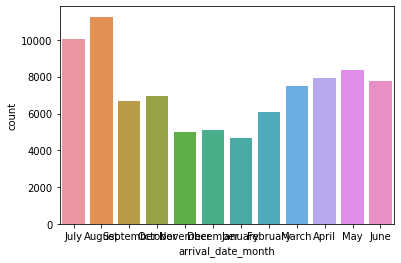

In [ ]:
sns.countplot(x='arrival_date_month',  data=hotel_data)


In [ ]:
hotel_data_raw.arrival_date_month.unique()

array(['July', 'August', 'September', 'October', 'November', 'December',
       'January', 'February', 'March', 'April', 'May', 'June'],
      dtype=object)

In [ ]:
pd.crosstab(index=hotel_data['arrival_date_month'], columns=hotel_data['is_canceled'])

is_canceled,0,1
arrival_date_month,,
April,5499,2409
August,7634,3623
December,3753,1378
February,4683,1415
January,3655,1038
July,6859,3198
June,5411,2354
March,5683,1830
May,5913,2442


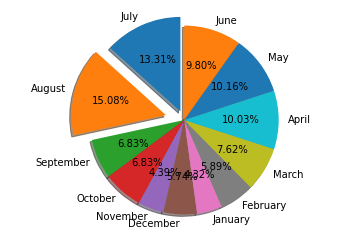

"\n# Plotting the pie chart for above dataframe\ndataframe.groupby(['arrival_date_month']).sum().plot(\n    kind='pie', y=', \n  autopct='%1.0f%%', colors=colors)"

In [ ]:
import matplotlib.pyplot as plt



# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = ['July', 'August', 'September', 'October', 'November', 'December','January', 'February', 'March', 'April', 'May', 'June']
sizes = [3198,3623,1642,1642,1054,1378,1038,1415,1830,2409,2442,2354]
explode = (0.1, 0.2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)  # only "explode" the 2nd slice (i.e. 'Aug')
plt.pie(sizes, labels=labels, explode=explode, autopct='%1.2f%%', shadow=True, startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

'''
# Plotting the pie chart for above dataframe
dataframe.groupby(['arrival_date_month']).sum().plot(
    kind='pie', y=', 
  autopct='%1.0f%%', colors=colors)'''

In [ ]:
import matplotlib.pyplot as plt
fig = plt.gcf() 
fig.set_size_inches(8, 6) 

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = ['July', 'August', 'September', 'October', 'November', 'December','January', 'February', 'March', 'April', 'May', 'June']
sizes = 
explode = (0.1, 0.2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)  # only "explode" the 1st and 2nd slices by o.1 and 0.2 units.
plt.pie(sizes, labels=labels, explode=explode, autopct='%1.2f%%', shadow=True, startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

SyntaxError: ignored

conculsion:
15.08% bookings have been cancelled in augest month which is maximum among all months.

In [ ]:
print(hotel_data['hotel'].value_counts())

City Hotel      53428
Resort Hotel    33968
Name: hotel, dtype: int64


In [ ]:
print(hotel_data['stays_in_weekend_nights'].value_counts())

0     35151
2     26414
1     22657
4      1734
3      1150
6       113
5        70
8        60
7        15
9        10
10        7
12        5
13        3
16        3
14        2
18        1
19        1
Name: stays_in_weekend_nights, dtype: int64


In [ ]:
pd.crosstab(index=hotel_data['hotel'], columns=hotel_data['stays_in_weekend_nights'])

stays_in_weekend_nights,0,1,2,3,4,5,6,7,8,9,10,12,13,14,16,18,19
hotel,,,,,,,,,,,,,,,,,
City Hotel,23249,15171,14308,301,277,42,39,6,24,5,2,0,1,2,1,0,0
Resort Hotel,11902,7486,12106,849,1457,28,74,9,36,5,5,5,2,0,2,1,1


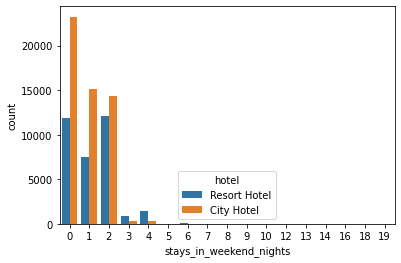

In [ ]:
# grouped by plot
sns.countplot(x='stays_in_weekend_nights',data=hotel_data, hue= 'hotel')

 which type of hotels are mostly booked in weekend nights?

 conl: city hotels are mostly booked in weekend nights.
 

In [ ]:
# which type of hotel get maximum number of cancellation of bookings:
# let's deal with question

In [ ]:
print(hotel_data['is_canceled'].value_counts())

0    63371
1    24025
Name: is_canceled, dtype: int64


In [ ]:
hotel_data['hotel'].value_counts()

City Hotel      53428
Resort Hotel    33968
Name: hotel, dtype: int64

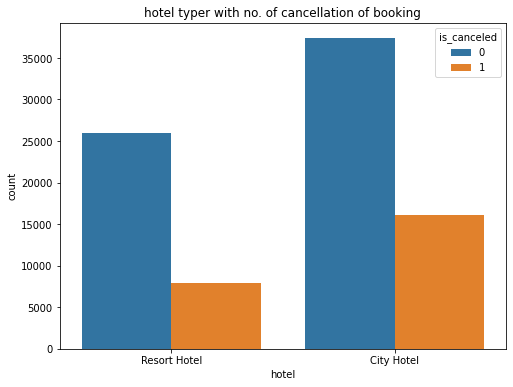

In [ ]:
'''# create
#a =  hotel_data['hotel'].value_counts()
#create the plot object
a.plot(kind='bar',stacked=True,hue=)
# set the display figure size using rcParams method
plt.rcParams['figure.figsize']=(10,5)
plt.title('hotel types with cancelation')
plt.xlabel('hotel types')'''


# ploting count plot 
  
fig = plt.gcf() 
fig.set_size_inches(8, 6) 
plt.title("hotel typer with no. of cancellation of booking") 



sns.countplot(x='hotel',data=hotel_data, hue ='is_canceled')

conclusion:
which type of hotel get maximum number of cancellation of bookings:
we can see city hotel get maximum number of cancellation of bookings as compare to resort Hotel.

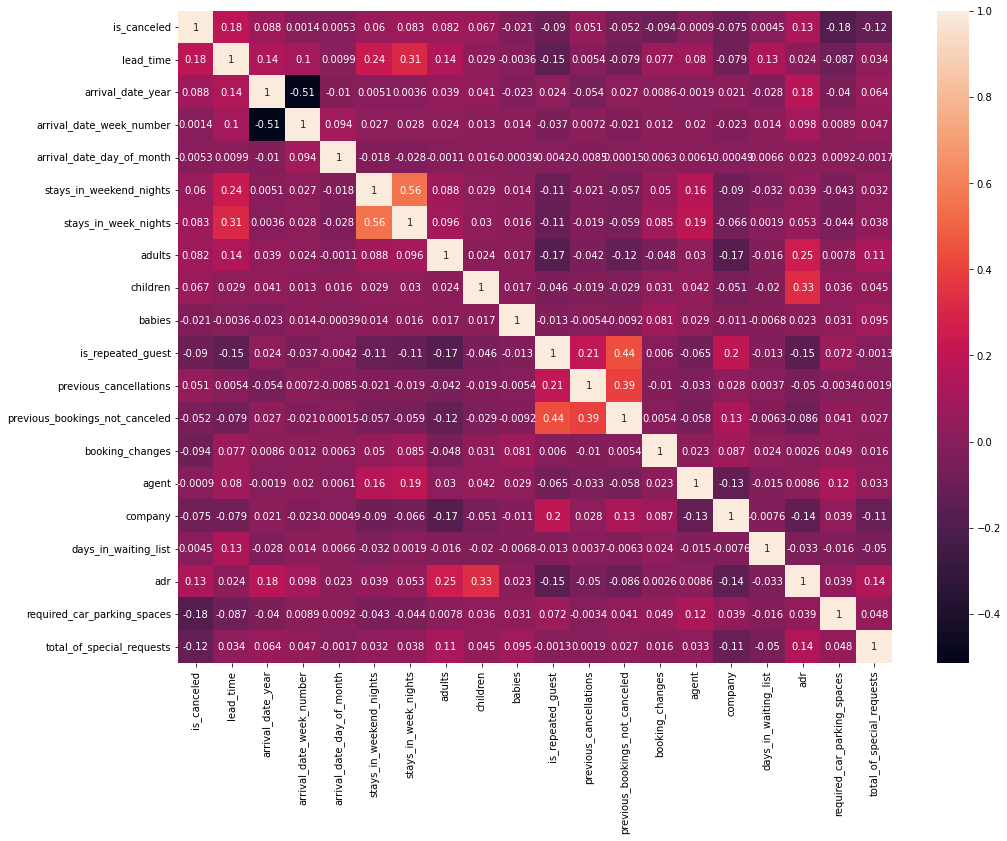

In [ ]:
hotel_data_df = hotel_data
corr_df = hotel_data_df.corr()
corr_df
plt.figure(figsize=(16,12))
sns.heatmap(corr_df, annot=True)


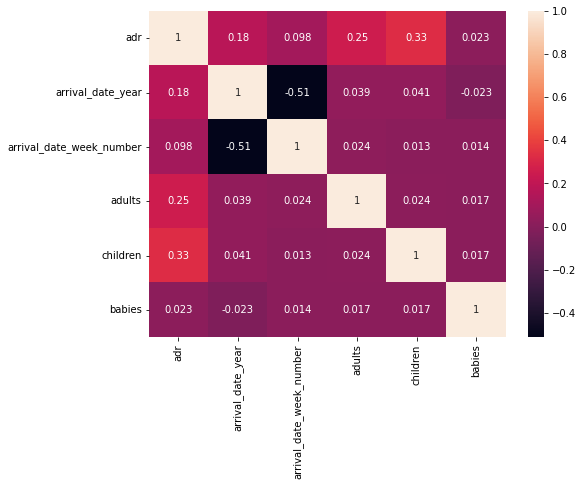

In [ ]:
hotel_data_df = hotel_data[['adr','arrival_date_year','arrival_date_week_number','adults','children','babies']]
corr_df = hotel_data_df.corr()
corr_df
plt.figure(figsize=(8,6))
sns.heatmap(corr_df, annot=True)

Average daily rate(ADR) is positively correlated to children, adults, and babies with 33%, 25% and 2% respectively. It means that maximum and minimum revenue is generated by occupied rooms with children and babies respectively.

It is observed that arrival_date_week_number and arrival_date_year are 51% negatively cor-related.



In [ ]:
hotel_data['market_segment'].value_counts()

Online TA        51618
Offline TA/TO    13889
Direct           11804
Groups            4942
Corporate         4212
Complementary      702
Aviation           227
Undefined            2
Name: market_segment, dtype: int64

Hotel market segmentation is a way of grouping your hotel guests into several segments based on a set of shared characteristics. The purpose of using hotel market segmentation lies in catering to each guest's needs better and maximising revenue through personalised experiences.


In [ ]:
hotel_data['distribution_channel'].value_counts()

TA/TO        69141
Direct       12988
Corporate     5081
GDS            181
Undefined        5
Name: distribution_channel, dtype: int64

At its highest level, a hotel distribution channel is anywhere — online or offline — that properties can sell rooms to potential customers. Examples of hotel distribution channels include hotel websites, online travel agencies (OTAs), global distribution systems (GDS), metasearch sites, direct phone bookings, and more


In [ ]:
# how many couples with children ordered meal?
hotel_data['meal'].value_counts()


BB           67978
SC            9481
HB            9085
Undefined      492
FB             360
Name: meal, dtype: int64

In [ ]:
# Bookings trend of hotels(city and resort hotel) month wise.
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September','October', 'November', 'December']
df_not_canceled = hotel_data[hotel_data['is_canceled'] == 0]
df_not_canceled
sorted_months = df_not_canceled['arrival_date_month'].value_counts().reindex(new_order)
#sorted_months = df_not_canceled['arrival_date_month'].value_counts()
sorted_months

January      3655
February     4683
March        5683
April        5499
May          5913
June         5411
July         6859
August       7634
September    5048
October      5292
November     3941
December     3753
Name: arrival_date_month, dtype: int64

Booking trend of hotels (City hotel and Resort hotel) monthwise.


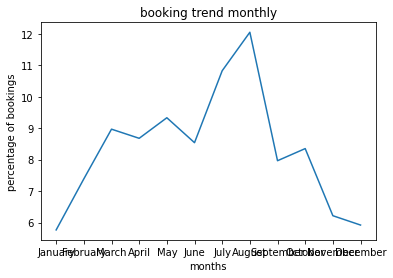

In [ ]:
sorted_months = df_not_canceled['arrival_date_month'].value_counts().reindex(new_order)

x = sorted_months.index
y = sorted_months/sorted_months.sum()*100
plt.plot(x,y)
plt.xlabel("months")
plt.ylabel('percentage of bookings')
plt.title('booking trend monthly')
plt.show()


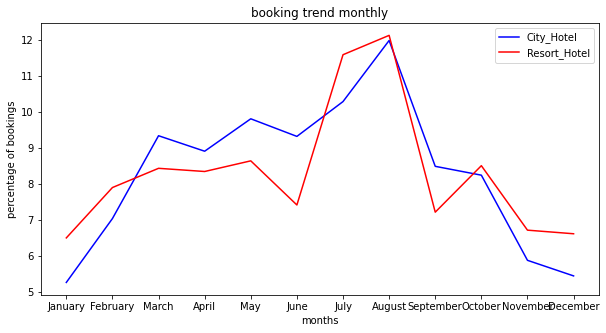

In [ ]:
#select only city hotel
sorted_months_1 = df_not_canceled.loc[hotel_data.hotel=='City Hotel','arrival_date_month'].value_counts().reindex(new_order)
# select only Resort hotel
sorted_months_2 = df_not_canceled.loc[hotel_data.hotel=='Resort Hotel','arrival_date_month'].value_counts().reindex(new_order)

x = sorted_months_1.index
y = sorted_months_1/sorted_months_1.sum()*100

w = sorted_months_2.index
z = sorted_months_2/sorted_months_2.sum()*100

plt.plot(x,y, label='City_Hotel', color='blue')
plt.plot(w,z, label='Resort_Hotel', color='red')
plt.legend()
plt.xlabel("months")
plt.ylabel('percentage of bookings')
plt.title('booking trend monthly')
plt.show()
plt.rcParams['figure.figsize']=(15,5)

from the graph, we can say, trend of booking for resort hotel which indicated by red line and city hotel which indicated by blue line is kind of similar with a small difference.
for the both hotels, more booking is in augest month followed by july month.
In march month, percentage of booking for both hotels is same.

ADR (Average Daily Rate) comparision of city hotel and resort hotel weekwise.

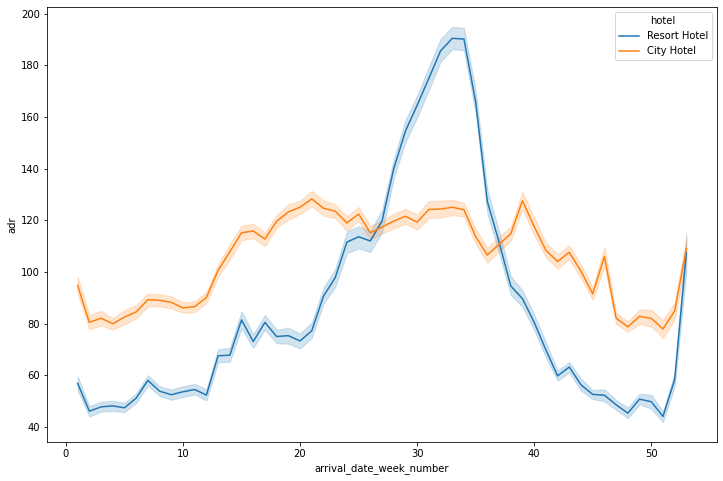

In [ ]:
# lineplot of ADR 
plt.figure(figsize=(12,8))
sns.lineplot(x = 'arrival_date_week_number',y = 'adr', hue='hotel', data=df_not_canceled)

 Difference of Adr in both hotel types is high at the starting week of year i.e january month. At the end of week, ADR of both hotel types is same.
Avarage Daily Rate (ADR) for the week 28 to 35 (approx) i.e the months of july and August are more for the resort Hotel than city hotel.

#In which year maximun number of reseervation_status is checked_out?

In [ ]:
hotel_data['reservation_status'].value_counts()

Check-Out    63371
Canceled     23011
No-Show       1014
Name: reservation_status, dtype: int64

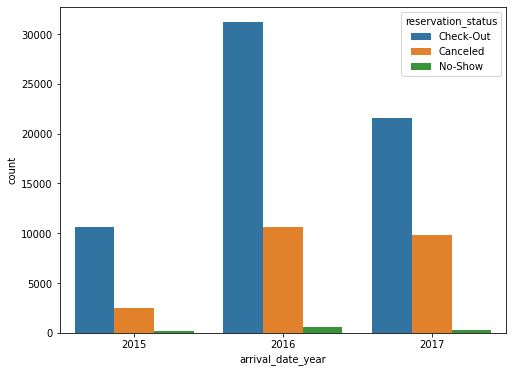

In [ ]:
fig = plt.gcf() 
fig.set_size_inches(8, 6) 
sns.countplot(x='arrival_date_year',data=hotel_data, hue= 'reservation_status')


conclusion: in 2016, maximun number of reseervation_status is checked_out.


# find the deposit-type of the customers having children

In [ ]:
hotel_data['customer_type'].value_counts()

Transient          71986
Transient-Party    11727
Contract            3139
Group                544
Name: customer_type, dtype: int64

In [ ]:
hotel_data['deposit_type'].value_counts()

No Deposit    86251
Non Refund     1038
Refundable      107
Name: deposit_type, dtype: int64

In [ ]:
hotel_data['children'].value_counts()

0.0     79032
1.0      4695
2.0      3593
3.0        75
10.0        1
Name: children, dtype: int64

In [ ]:
df_having_children = hotel_data[hotel_data['children'] != 0]
df_having_children

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
13,Resort Hotel,0,18,2015,July,27,1,0,4,2,...,No Deposit,241.0,0.0,0,Transient,154.77,0,1,Check-Out,2015-07-05
45,Resort Hotel,1,47,2015,July,27,2,2,5,2,...,No Deposit,240.0,0.0,0,Transient,153.00,0,0,Canceled,2015-06-02
55,Resort Hotel,0,1,2015,July,27,2,0,1,2,...,No Deposit,0.0,0.0,0,Transient,107.00,1,2,Check-Out,2015-07-03
65,Resort Hotel,0,10,2015,July,27,3,0,2,2,...,No Deposit,240.0,0.0,0,Transient,153.00,1,0,Check-Out,2015-07-05
87,Resort Hotel,1,79,2015,July,27,3,6,15,2,...,No Deposit,242.0,0.0,0,Transient,108.73,0,2,Canceled,2015-04-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119270,City Hotel,0,0,2017,August,35,29,0,3,2,...,No Deposit,9.0,0.0,0,Transient,135.00,0,2,Check-Out,2017-09-01
119287,City Hotel,0,167,2017,August,35,27,2,4,2,...,No Deposit,9.0,0.0,0,Transient,177.75,0,0,Check-Out,2017-09-02
119293,City Hotel,0,243,2017,August,35,30,0,3,2,...,No Deposit,9.0,0.0,0,Transient,189.00,0,3,Check-Out,2017-09-02
119318,City Hotel,0,160,2017,August,35,29,0,5,2,...,No Deposit,9.0,0.0,0,Transient,153.90,0,0,Check-Out,2017-09-03


In [ ]:
df_having_children['children'].value_counts()

1.0     4695
2.0     3593
3.0       75
10.0       1
Name: children, dtype: int64

In [ ]:
pd.crosstab(index=df_having_children['deposit_type'], columns=df_having_children['children'])

children,1.0,2.0,3.0,10.0
deposit_type,,,,
No Deposit,4689,3589,75,1
Non Refund,3,3,0,0
Refundable,3,1,0,0


In [ ]:
pd.crosstab(index=hotel_data['children'], columns=hotel_data['deposit_type'])

deposit_type,No Deposit,Non Refund,Refundable
children,,,
0.0,77897,1032,103
1.0,4689,3,3
2.0,3589,3,1
3.0,75,0,0
10.0,1,0,0


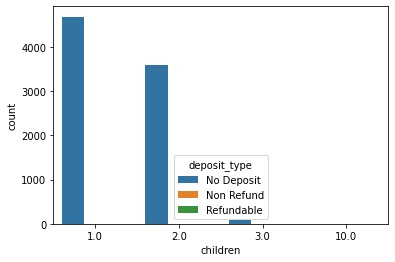

In [ ]:
# grouped by plot
sns.countplot(x='children',data=df_having_children, hue= 'deposit_type')

# What is most preferred meal type for every customer type?

In [17]:
hotel_data['meal'].value_counts()

BB           67978
SC            9481
HB            9085
Undefined      492
FB             360
Name: meal, dtype: int64

In [18]:
hotel_data['customer_type'].value_counts()

Transient          71986
Transient-Party    11727
Contract            3139
Group                544
Name: customer_type, dtype: int64

In [19]:
# to make proper dataframe
pd.DataFrame(hotel_data['customer_type'].value_counts(), columns=['customer_type'])

,customer_type
Transient,71986
Transient-Party,11727
Contract,3139
Group,544


In [34]:
list(hotel_data['customer_type'].value_counts())

[71986, 11727, 3139, 544]

In [33]:
data1 = hotel_data.loc[hotel_data['customer_type']!=0,'meal'].value_counts() # meal

data1 = pd.DataFrame(data1,columns = ['meal'])
data1
data1.index=['Bed and Breakfast', 'Half Board','Self Catering','Undefined','Full Board']
data1

,meal
Bed and Breakfast,67978
Half Board,9481
Self Catering,9085
Undefined,492
Full Board,360


In [43]:
index= list(df.index)
index

['BB', 'FB', 'HB', 'SC', 'Undefined']

In [46]:
columns = list(df.columns)
columns

['Contract', 'Group', 'Transient', 'Transient-Party']

In [51]:
list(df['Contract'])


[2364, 5, 583, 173, 14]

In [52]:
list(df['Group'])


[468, 1, 35, 38, 2]

In [53]:
list(df['Transient'])

[56152, 264, 6425, 8927, 218]

In [57]:
list(df['Transient-Party'])

[8994, 90, 2042, 343, 258]

KeyError: ignored

In [37]:
df = pd.crosstab(index=hotel_data['meal'], columns=hotel_data['customer_type'])
df

customer_type,Contract,Group,Transient,Transient-Party
meal,,,,
BB,2364,468,56152,8994
FB,5,1,264,90
HB,583,35,6425,2042
SC,173,38,8927,343
Undefined,14,2,218,258


In [63]:
df = pd.crosstab(index=hotel_data['customer_type'], columns=hotel_data['meal'])
df

meal,BB,FB,HB,SC,Undefined
customer_type,,,,,
Contract,2364,5,583,173,14
Group,468,1,35,38,2
Transient,56152,264,6425,8927,218
Transient-Party,8994,90,2042,343,258


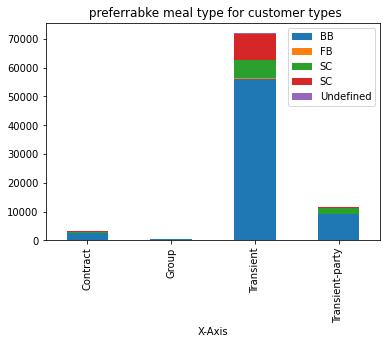

In [66]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
data_frame = pd.DataFrame([['Contract', 2364, 5, 583, 173,14], ['Group',468,1, 35, 38, 2], ['Transient',56152, 264, 6425, 8927,218],
                   ['Transient-party', 8994, 90, 2042, 343, 258]],
                  columns=['X-Axis', 'BB', 'FB', 'SC', 'SC', 'Undefined'])
data_frame
data_frame.plot(x='X-Axis', kind='bar', stacked=True, title=' preferrable meal type for customer types')


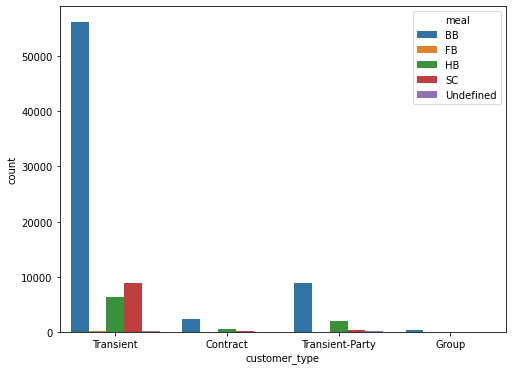

In [36]:
fig = plt.gcf() 
fig.set_size_inches(8, 6) 
sns.countplot(x='customer_type',data=hotel_data, hue= 'meal')